In [1]:
!pip install fcapy
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [2]:
import pandas as pd
import numpy as np

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_1118/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data_filled =  pd.read_csv('heart_disease_bin_prep.csv')
data_filled

,sex,age 29-40,age 41-52,age 53-64,age 65-71,cp = 0,cp = 1,cp = 2,cp = 3,thalach 70-95,...,ca = 1,ca = 2,ca = 3,ca = 4,ca = 5,thal = 0,thal = 1,thal = 2,thal = 3,target
0,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
299,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
300,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
301,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [6]:
data_filled['sample_id'] = np.arange(0, data_filled.shape[0], 1).astype(str)
data_filled['id'] = data_filled['sample_id'].apply(lambda x: 'h' + x)
data_filled.drop(columns=['sample_id'], inplace=True)
data_filled = data_filled.set_index('id')
data_filled

,sex,age 29-40,age 41-52,age 53-64,age 65-71,cp = 0,cp = 1,cp = 2,cp = 3,thalach 70-95,...,ca = 1,ca = 2,ca = 3,ca = 4,ca = 5,thal = 0,thal = 1,thal = 2,thal = 3,target
id,,,,,,,,,,,,,,,,,,,,,
h0,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
h1,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
h2,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
h3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
h4,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h298,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
h299,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
h300,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [7]:
y = data_filled['target']
data_filled.drop(['target'], axis=1, inplace=True)

## DATA SPLITTING

In [8]:
from sklearn.model_selection import train_test_split
X_train_, X_rem, y_train_, y_rem = train_test_split(data_filled,y, train_size=0.6, random_state = 3)
X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 3)

In [9]:
y.value_counts()

target
True     165
False    138
Name: count, dtype: int64

In [10]:
X_train_.shape

(181, 33)

In [11]:
y_train_.value_counts()

target
True     95
False    86
Name: count, dtype: int64

In [12]:
X_valid.shape

(61, 33)

In [13]:
y_valid.value_counts()

target
True     36
False    25
Name: count, dtype: int64

In [14]:
X_test_.shape

(61, 33)

In [15]:
y_test_.value_counts()

target
True     34
False    27
Name: count, dtype: int64

## FCA PART

In [16]:
K_train_ = FormalContext.from_pandas(X_train_)
K_train_

FormalContext (181 objects, 33 attributes, 1335 connections)
    |sex|age 29-40|age 41-52|age 53-64|age 65-71|...|ca = 5|thal = 0|thal = 1|thal = 2|thal = 3|
h4  |   |         |         |        X|         |...|      |        |        |       X|        |
h239|   |        X|         |         |         |...|      |        |        |        |       X|
h126|   |         |        X|         |         |...|      |        |        |       X|        |
h210|   |         |         |        X|         |...|      |        |        |        |       X|
h89 |   |         |         |        X|         |...|      |        |        |       X|        |
h159|   |         |         |        X|         |...|      |        |        |        |       X|
h34 |   |         |        X|         |         |...|      |        |        |       X|        |
h72 |   |        X|         |         |         |...|      |        |        |       X|        |
h276|   |         |         |        X|         |...|      |      

In [17]:
L_ = ConceptLattice.from_context(K_train_, algo='Sofia', is_monotone= True)
len(L_)

100

In [18]:
for c in L_:
    print(c.intent)

('sex', 'ca = 5')
('sex', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'oldpeak 2.', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'oldpeak 3.-6.', 'slope = 0', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'ca = 2', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'age 29-40', 'cp = 3', 'thalach 70-95', 'thalach 186-202', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'age 29-40', 'cp = 1', 'thalach 70-95', 'thalach 186-202', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'thalach 70-95', 'oldpeak 1.', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'age 29-40', 'age 65-71', 'cp = 3', 'thalach 70-95', 'thalach 186-202', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'age 29-40', 'cp = 3', 'thalach 70-95', 'thalach 186-202', 'oldpeak 3.-6.', 'slope = 0', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
('sex', 'oldpeak 2.', 'oldpeak 3.-6.', 'slope = 0', 'ca = 2'

## Experiment with all concepts

In [19]:
L_ind = []
for c in L_:
    L_ind.append(L_.index(c))
#L_ind = L_ind[:3]
print(L_ind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [20]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
epochs_list = []
cn = nl.ConceptNetwork.from_lattice(L_, L_ind, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred = pred_all[1]
    pred_train = pred_train_all[1]

    print('score train:', f1_score(y_train_, pred_train))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
print(max(f1_list))

Epoch  50
score train: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score test: 0.0
Epoch  150
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  200
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  250
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  300
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  350
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  400
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  450
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  500
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  550
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  600
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  650
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  700
score train: 0.6884057971014492
score test: 0.7157894736842105
Epoch  750
score train: 0

([<matplotlib.axis.YTick at 0x2872460c0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95')])

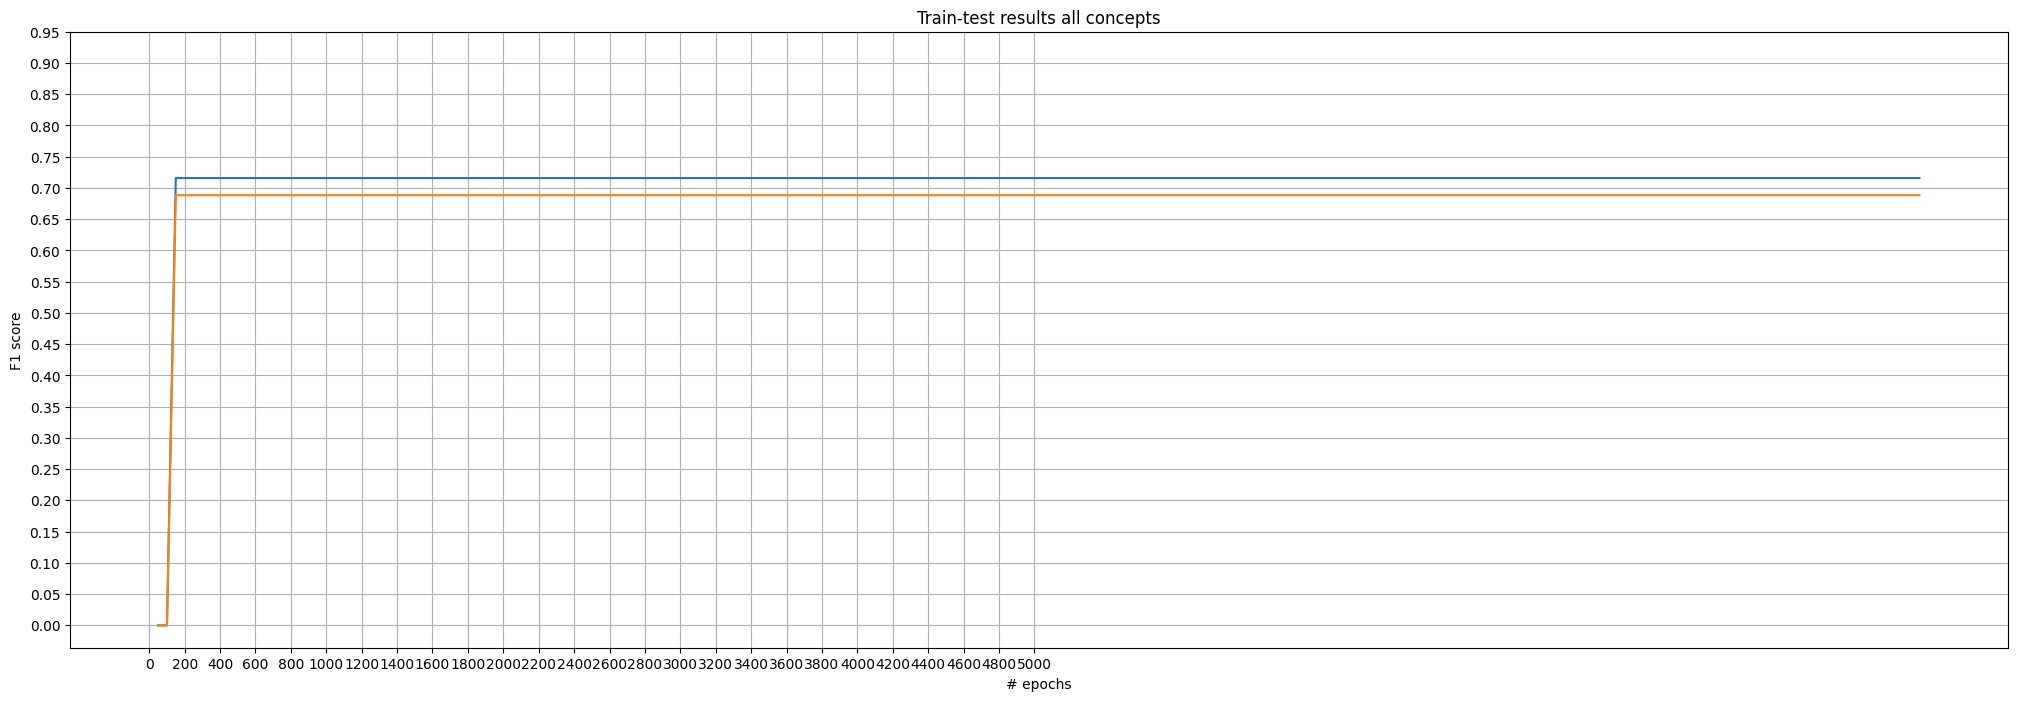

In [21]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)

plt.title('Train-test results all concepts')
plt.xlabel("# epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(0, 5200, 200))
plt.yticks(np.arange(0, 1, 0.05))

In [22]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [23]:
edge_weights = cn.edge_weights_from_network()

/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:620.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


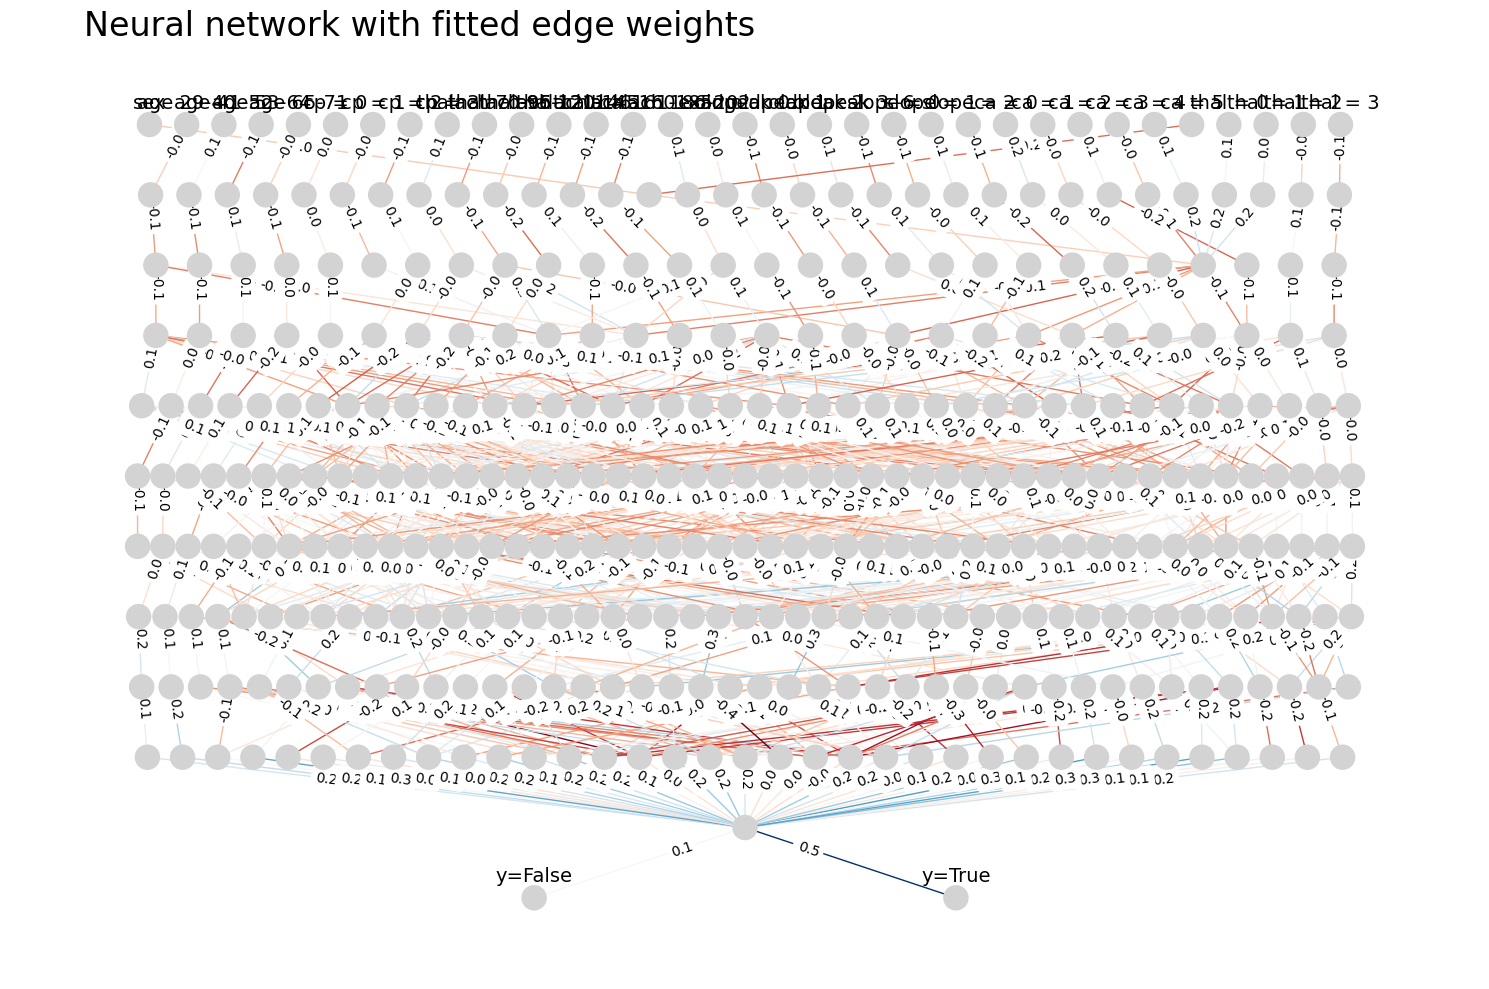

In [24]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()

## End of experiments with all concepts

### Purity function

In [25]:
def purity(concept, y_train):
    count_pos = 0
    count_neg = 0
    positive = True
    for obj in concept.extent:
        if y_train[obj] == True:
            count_pos+= 1
        else:
            count_neg+= 1
            
    if count_pos < count_neg:
        positive = False
    if len(concept.extent)!= 0:
        return count_pos, count_neg, max(count_pos, count_neg)/ len(concept.extent), positive
    else:
        return 0,0, 0, False

### Object coverage function

In [26]:
def obj_coverage(concept, y_train):
    return round(len(concept.extent)/len(y_train),2)

### Concept properties calculation

In [27]:
L_prop = []
conc_prop = []
pos = 0 
neg = 0
pur  = 0
pur_list = []
cover = 0
for c in L_:
    conc_prop.append(c) # 0-s element is concepts itself
    pos, neg, pur, positive = purity(c, y_train_)
    pur_list.append(pos)
    pur_list.append(neg)
    pur_list.append(pur)
    pur_list.append(positive)
    cover = obj_coverage(c, y_train_)
    conc_prop.append(pur_list) #  1-s element is purity itself
    conc_prop.append(cover)  #  2-s element is coverage itself
    L_prop.append(conc_prop)
    conc_prop = []
    pur_list = []
    pur = 0
    cover = 0 

In [28]:
pur_list = []
cover_list = []
for c in L_prop:
    pur_list.append(c[1][2]) # just purities
    cover_list.append(c[2])  #just object coverages

In [29]:
print('min-max purity:', min(pur_list), max(pur_list)) # this particular train-test-valid
print('min-max coverage:', min(cover_list), max(cover_list)) # (object coverage)

min-max purity: 0 0.6938775510204082
min-max coverage: 0.0 1.0


In [30]:
for c in L_prop:
    print(round(c[1][2],2),round(c[2],2)) # for each concept print its purity and object coverage

0 0.0
0.59 0.15
0.64 0.23
0.62 0.25
0.69 0.27
0.55 0.29
0.57 0.35
0.58 0.36
0.59 0.36
0.52 0.38
0.68 0.39
0.63 0.42
0.63 0.44
0.57 0.45
0.51 0.46
0.52 0.46
0.54 0.49
0.59 0.5
0.58 0.51
0.6 0.51
0.52 0.52
0.52 0.52
0.69 0.54
0.63 0.55
0.65 0.56
0.51 0.56
0.56 0.6
0.64 0.61
0.58 0.62
0.65 0.62
0.62 0.63
0.52 0.64
0.57 0.64
0.61 0.66
0.61 0.66
0.51 0.66
0.55 0.66
0.53 0.66
0.6 0.69
0.58 0.69
0.52 0.69
0.63 0.7
0.56 0.7
0.65 0.7
0.56 0.71
0.63 0.71
0.61 0.72
0.57 0.74
0.55 0.74
0.53 0.76
0.61 0.76
0.57 0.76
0.55 0.77
0.56 0.77
0.56 0.77
0.57 0.77
0.55 0.77
0.55 0.79
0.54 0.8
0.58 0.8
0.58 0.8
0.58 0.8
0.55 0.8
0.5 0.8
0.58 0.81
0.56 0.81
0.59 0.81
0.52 0.82
0.51 0.82
0.53 0.83
0.57 0.83
0.58 0.85
0.56 0.86
0.52 0.87
0.56 0.87
0.51 0.87
0.54 0.87
0.51 0.87
0.52 0.88
0.53 0.88
0.52 0.89
0.5 0.89
0.51 0.89
0.55 0.9
0.58 0.9
0.51 0.9
0.51 0.9
0.57 0.9
0.5 0.91
0.51 0.91
0.5 0.91
0.52 0.91
0.51 0.91
0.51 0.92
0.52 0.92
0.51 0.93
0.51 0.93
0.54 0.93
0.54 0.93
0.52 1.0


In [31]:
count_pur_one_sided = {} # dictionary of number of concepts in  the purity interval [key,) (from this value and above)
pur_conc_one_sided = {} # dictionary of concept lists in  the purity interval [key, )
pur_conc_all_one_sided ={} # dictionary of all concepts (with all properties) belonging to particular intervals
cov_conc_one_sided = {} # dictionart of all concepts' coverages belonging to particular intervals

for i in np.arange(0, 1, 0.05):
    count_pur_one_sided[round(i,2)] = 0
    pur_conc_one_sided[round(i,2)] = []
    pur_conc_all_one_sided[round(i,2)] = []
    cov_conc_one_sided[round(i,2)] = []
    
   # print(round(i,2))
    for c in L_prop:
        if (round(c[1][2],2)>= round(i,2)): # purity above this threshold 
            print( round(i,2))
            print(c[1][2])
            count_pur_one_sided[round(i,2)]+=1 # how many in this interval
            pur_conc_one_sided[round(i,2)].append(c[0]) # what concepts are in this interval
            pur_conc_all_one_sided[round(i,2)].append(c) # add everything connected to this concepts
            cov_conc_one_sided[round(i,2)].append(c[2]) # add object coverage connected to this concepts
            
# print(count_pur)
# check_1 = 0
# check_2 = 0
# for key in count_pur:
#     check_1+=count_pur[key]
#     check_2+=len(pur_conc[key])
# print(check_1, check_2)

0.0
0
0.0
0.5925925925925926
0.0
0.6428571428571429
0.0
0.6222222222222222
0.0
0.6938775510204082
0.0
0.5471698113207547
0.0
0.5714285714285714
0.0
0.5757575757575758
0.0
0.5909090909090909
0.0
0.5217391304347826
0.0
0.676056338028169
0.0
0.631578947368421
0.0
0.6329113924050633
0.0
0.573170731707317
0.0
0.5119047619047619
0.0
0.5238095238095238
0.0
0.5393258426966292
0.0
0.5934065934065934
0.0
0.5806451612903226
0.0
0.6021505376344086
0.0
0.5212765957446809
0.0
0.5157894736842106
0.0
0.6907216494845361
0.0
0.63
0.0
0.6534653465346535
0.0
0.5098039215686274
0.0
0.5596330275229358
0.0
0.6363636363636364
0.0
0.5803571428571429
0.0
0.6460176991150443
0.0
0.6228070175438597
0.0
0.5217391304347826
0.0
0.5689655172413793
0.0
0.6050420168067226
0.0
0.6050420168067226
0.0
0.5083333333333333
0.0
0.55
0.0
0.5333333333333333
0.0
0.6048387096774194
0.0
0.576
0.0
0.52
0.0
0.6349206349206349
0.0
0.5555555555555556
0.0
0.6456692913385826
0.0
0.5625
0.0
0.6328125
0.0
0.6076923076923076
0.0
0.574626865

In [32]:
print(count_pur_one_sided)


{0.0: 100, 0.05: 99, 0.1: 99, 0.15: 99, 0.2: 99, 0.25: 99, 0.3: 99, 0.35: 99, 0.4: 99, 0.45: 99, 0.5: 99, 0.55: 59, 0.6: 21, 0.65: 6, 0.7: 0, 0.75: 0, 0.8: 0, 0.85: 0, 0.9: 0, 0.95: 0}


In [33]:
for key in pur_conc_all_one_sided:
    print(key, count_pur_one_sided[key]) # number of concept with purity above this 
    if count_pur_one_sided[key] == 0:
        print('0')
    else:
        print(max(cov_conc_one_sided[key]))

0.0 100
1.0
0.05 99
1.0
0.1 99
1.0
0.15 99
1.0
0.2 99
1.0
0.25 99
1.0
0.3 99
1.0
0.35 99
1.0
0.4 99
1.0
0.45 99
1.0
0.5 99
1.0
0.55 59
0.9
0.6 21
0.76
0.65 6
0.7
0.7 0
0
0.75 0
0
0.8 0
0
0.85 0
0
0.9 0
0
0.95 0
0


In [34]:
for c in pur_conc_one_sided[0.65]:
    print(L_.index(c))

4
10
22
24
29
43


# Concept analysis

In [35]:
pur_065 = 0.65

In [36]:
table_hd_065 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.65')
i = 0
for conc in pur_conc_all_one_sided[pur_065]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    table_hd_065.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_hd_065.to_csv('table_hd_065.csv')
table_hd_065

purity >= 0.65
positive objects 15
negative objects 34
purity 0.69
positive objects 23
negative objects 48
purity 0.68
positive objects 30
negative objects 67
purity 0.69
positive objects 35
negative objects 66
purity 0.65
positive objects 40
negative objects 73
purity 0.65
positive objects 82
negative objects 45
purity 0.65


,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(sex, ca = 2, ca = 3, ca = 4, ca = 5, thal = 0...",0.69,0.27,15,34,False
1,"(sex, oldpeak 2., oldpeak 3.-6., slope = 0, ca...",0.68,0.39,23,48,False
2,"(sex, thalach 70-95, oldpeak 2., ca = 3, ca = ...",0.69,0.54,30,67,False
3,"(sex, thalach 70-95, oldpeak 2., oldpeak 3.-6....",0.65,0.56,35,66,False
4,"(sex, thalach 70-95, oldpeak 2., ca = 1, ca = ...",0.65,0.62,40,73,False
5,"(sex, age 29-40, cp = 3, thalach 70-95, thalac...",0.65,0.70,82,45,True


In [37]:
pur_065 = 0.65
table_hd_065 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.65')
i = 0
for conc in pur_conc_all_one_sided[pur_065]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    print(conc[2])
    print(conc[1][3])
    print(conc[0].intent)


    table_hd_065[len(table_hd_065)] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_hd_065.to_csv('table_hd_065.csv')
table_hd_065

purity >= 0.65
positive objects 15
negative objects 34
purity 0.69
0.27
False
('sex', 'ca = 2', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 23
negative objects 48
purity 0.68
0.39
False
('sex', 'oldpeak 2.', 'oldpeak 3.-6.', 'slope = 0', 'ca = 2', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 30
negative objects 67
purity 0.69
0.54
False
('sex', 'thalach 70-95', 'oldpeak 2.', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1', 'thal = 3')
positive objects 35
negative objects 66
purity 0.65
0.56
False
('sex', 'thalach 70-95', 'oldpeak 2.', 'oldpeak 3.-6.', 'slope = 0', 'ca = 1', 'ca = 2', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 40
negative objects 73
purity 0.65
0.62
False
('sex', 'thalach 70-95', 'oldpeak 2.', 'ca = 1', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1', 'thal = 3')
positive objects 82
negative objects 45
purity 0.65
0.7
True
('sex', 'age 29-40', 'cp = 3', 'thalach 70-95', 'thalach 1

,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?,0,6
0,NaN,NaN,NaN,NaN,NaN,NaN,"(sex, ca = 2, ca = 3, ca = 4, ca = 5, thal = 0...","(sex, age 29-40, cp = 3, thalach 70-95, thalac..."
1,NaN,NaN,NaN,NaN,NaN,NaN,0.69,0.65
2,NaN,NaN,NaN,NaN,NaN,NaN,0.27,0.7
3,NaN,NaN,NaN,NaN,NaN,NaN,15,82
4,NaN,NaN,NaN,NaN,NaN,NaN,34,45
5,NaN,NaN,NaN,NaN,NaN,NaN,False,True


In [38]:
pur_06= 0.6

print('purity >= 0.65')
table_06_065_hd = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])
for conc in pur_conc_all_one_sided[pur_06]:
    if round(conc[1][2],2) < 0.65:
        table_06_065_hd.loc[len(table_06_065_hd)] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
        print('positive objects', conc[1][0])
        print('negative objects', conc[1][1])
        print('purity', round(conc[1][2],2))
        print(conc[2])
        print(conc[1][3])
        print(conc[0].intent)
      
table_06_065_hd.to_csv('table_06_065_hd.csv')
table_06_065_hd

purity >= 0.65
positive objects 15
negative objects 27
purity 0.64
0.23
False
('sex', 'oldpeak 2.', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 17
negative objects 28
purity 0.62
0.25
False
('sex', 'oldpeak 3.-6.', 'slope = 0', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 28
negative objects 48
purity 0.63
0.42
False
('sex', 'thalach 70-95', 'oldpeak 2.', 'ca = 1', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 29
negative objects 50
purity 0.63
0.44
False
('sex', 'thalach 70-95', 'oldpeak 3.-6.', 'slope = 0', 'ca = 1', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 56
negative objects 37
purity 0.6
0.51
True
('sex', 'age 29-40', 'age 65-71', 'cp = 1', 'cp = 3', 'thalach 70-95', 'thalach 186-202', 'slope = 0', 'ca = 3', 'ca = 4', 'ca = 5', 'thal = 0', 'thal = 1')
positive objects 37
negative objects 63
purity 0.63
0.55
False
('sex', 'thalach 70-95', 'oldpeak 1.', 'oldpeak 2.', 'oldpeak 

,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(sex, oldpeak 2., ca = 3, ca = 4, ca = 5, thal...",0.64,0.23,15,27,False
1,"(sex, oldpeak 3.-6., slope = 0, ca = 3, ca = 4...",0.62,0.25,17,28,False
2,"(sex, thalach 70-95, oldpeak 2., ca = 1, ca = ...",0.63,0.42,28,48,False
3,"(sex, thalach 70-95, oldpeak 3.-6., slope = 0,...",0.63,0.44,29,50,False
4,"(sex, age 29-40, age 65-71, cp = 1, cp = 3, th...",0.60,0.51,56,37,True
5,"(sex, thalach 70-95, oldpeak 1., oldpeak 2., o...",0.63,0.55,37,63,False
6,"(sex, thalach 70-95, oldpeak 1., ca = 3, ca = ...",0.64,0.61,40,70,False
7,"(sex, age 29-40, cp = 1, thalach 70-95, thalac...",0.62,0.63,71,43,True
8,"(sex, thalach 70-95, oldpeak 1., oldpeak 2., o...",0.61,0.66,47,72,False
9,"(sex, age 29-40, cp = 3, thalach 70-95, thalac...",0.61,0.66,47,72,False


## 2 concepts

### 1. Check for purity above 0.65

In [39]:
pur_065 = 0.65
L_ind_065 = []
for conc in pur_conc_all_one_sided[pur_065]:
    L_ind_065.append(L_.index(conc[0]))
print(L_ind_065)

[4, 10, 22, 24, 29, 43]


In [40]:
len(L_ind_065)

6

### 2. Check for purity above 0.6

In [48]:
pur_06 = 0.6
L_ind_06 = []
for conc in pur_conc_all_one_sided[pur_06]:
    L_ind_06.append(L_.index(conc[0]))
print(L_ind_06)

[2, 3, 4, 10, 11, 12, 19, 22, 23, 24, 27, 29, 30, 33, 34, 38, 41, 43, 45, 46, 50]


### 3. Let's try all concepts from the interval >= 0.65 (0.6)

In [42]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_065][0][0].extent))
for conc in pur_conc_all_one_sided[pur_065]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))

0.27
0.39
0.54
0.56
0.62
0.7
1.0


In [43]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_06_all_hd = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_06, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_06_all_hd.loc[len(res_06_all_hd)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  100
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  150
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  200
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  250
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  300
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  350
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  400
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  450
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  500
score train: 0.6884057971014492
score val: 0.742268041

In [44]:
res_06_all_hd.to_csv('heart_disease_06_all.csv')

([<matplotlib.axis.YTick at 0x287354f80>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

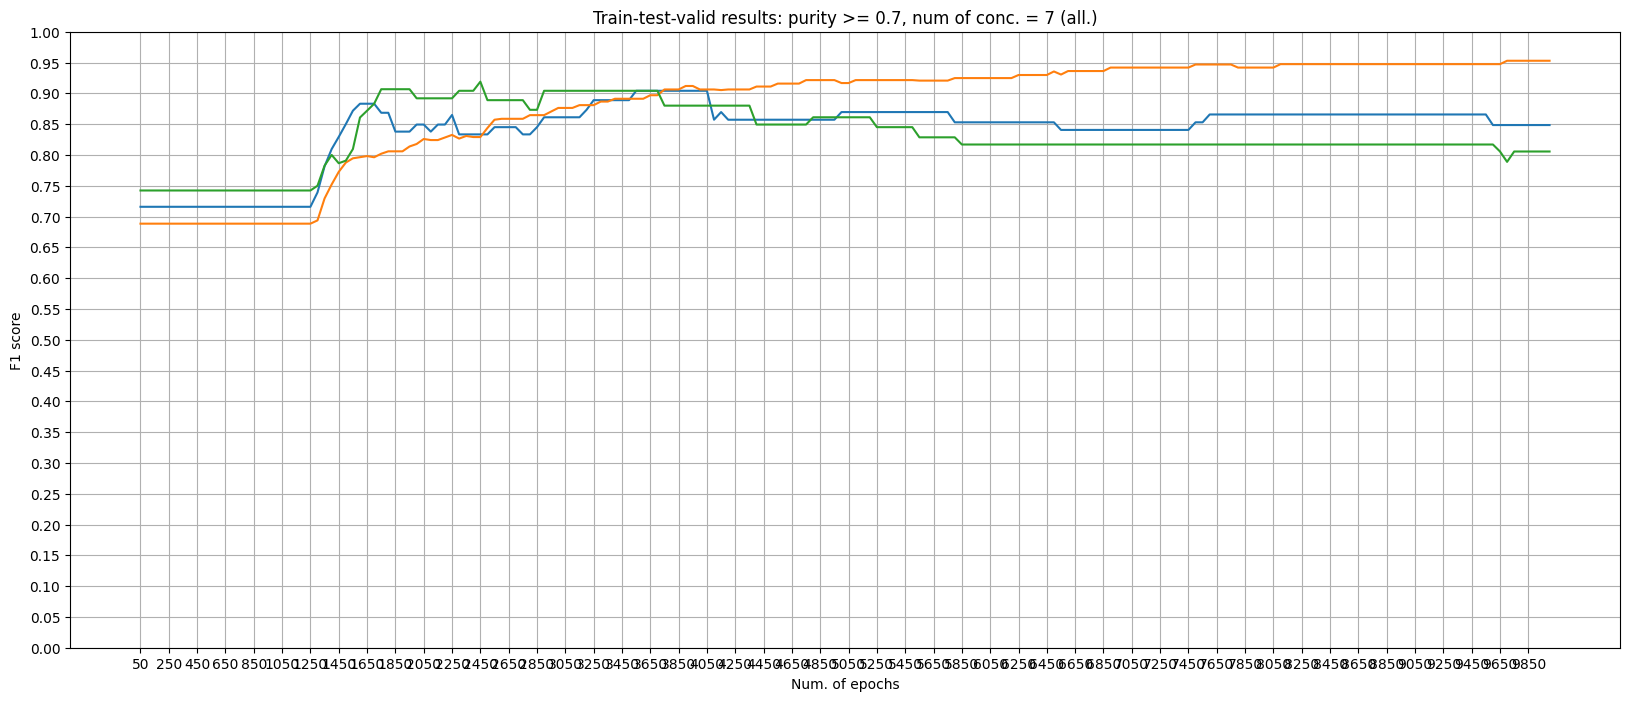

In [45]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

In [46]:
res_06_all_hd[res_06_all_hd['epoch']==3700]

,epoch,F1_score_train,F1_score_val,F1_score_test
73,3700.0,0.896907,0.90411,0.90411


In [47]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_06, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[6], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(74):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.8571428571428571
1
score test: 0.8888888888888888
2
score test: 0.8732394366197183
3
score test: 0.9041095890410958
4
score test: 0.9041095890410958
5
score test: 0.9166666666666666
6
score test: 0.8888888888888888
7


/opt/homebrew/Cellar/jupyterlab/4.1.0/libexec/lib/python3.12/site-packages/sparselinear/sparselinear.py:109: SyntaxWarning: invalid escape sequence '\_'
  """Applies a linear transformation to the incoming data: :math:`y = xA^T + b`


KeyboardInterrupt: 

## 2 concepts with purity > 0.65

In [ ]:
n = 2
pur_ = 0.65
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

## 2 concepts with purity > 0.6

In [49]:
n = 2
pur_3 = 0.6
sorted_cov = sorted(cov_conc_one_sided[pur_3])

t = count_pur_one_sided[pur_3]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_3]:
        if c[2] == sorted_cov[-i]:
            #print('lala', sorted_cov[-i])
            #print('fc',L_.index(first_c[0]))
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_3]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
    #print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

{1: [1.0, [50, 22]], 2: [1.0, [46, 24]], 3: [1.0, [45, 24]], 4: [1.0, [41, 22]], 5: [1.0, [41, 22]], 6: [1.0, [38, 41]], 7: [1.0, [33, 43]], 8: [1.0, [33, 43]], 9: [0.93, [30, 33]], 10: [1.0, [29, 41]], 11: [1.0, [27, 41]], 12: [1.0, [24, 43]], 13: [0.92, [23, 45]], 14: [1.0, [22, 41]], 15: [0.83, [19, 38]], 16: [0.93, [12, 46]], 17: [0.92, [11, 43]], 18: [0.87, [10, 45]], 19: [0.82, [4, 45]], 20: [0.8, [3, 50]], 21: [0.81, [2, 50]]}


In [ ]:
print('1', L_[30].intent, L_[4].intent)
print('2', L_[22].intent, L_[4].intent)
print('3', L_[8].intent, L_[30].intent)


# print('5', L_[34].intent, L_[6].intent)
# print('2', L_[40].intent, L_[6].intent)
# print('6', L_[29].intent, L_[6].intent)
# print('11', L_[21].intent, L_[6].intent)
# print('12', L_[18].intent, L_[6].intent)
# print('7', L_[25].intent, L_[6].intent)
# print('10', L_[23].intent, L_[6].intent)
# print('14', L_[15].intent, L_[6].intent)
# print('17', L_[10].intent, L_[6].intent)
# print('15', L_[13].intent, L_[6].intent)
# print('18', L_[7].intent, L_[6].intent)
# print('20', L_[5].intent, L_[6].intent)
# print('23', L_[1].intent, L_[41].intent)

In [54]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[2][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_60_2_2_hd= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(80):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_60_2_2_hd.loc[len(res_60_2_2_hd)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  100
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  150
score train: 0.6884057971014492
score val: 0.7422680412371134
score test: 0.7157894736842105
Epoch  200
score train: 0.753968253968254
score val: 0.7526881720430108
score test: 0.7727272727272727
Epoch  250
score train: 0.8051948051948052
score val: 0.8235294117647058
score test: 0.8607594936708861
Epoch  300
score train: 0.8288288288288288
score val: 0.8641975308641975
score test: 0.8607594936708861
Epoch  350
score train: 0.8411214953271028
score val: 0.8607594936708861
score test: 0.8717948717948718
Epoch  400
score train: 0.8436018957345972
score val: 0.8607594936708861
score test: 0.8947368421052632
Epoch  450
score train: 0.8405797101449275
score val: 0.8607594936708861
score test: 0.88
Epoch  500
score train: 0.8415841584158416
score val: 0.8717948717948718
score t

In [53]:
res_60_2_2_hd[res_60_2_2_hd['epoch']==1650]

,cov,epoch,F1_score_train,F1_score_val,F1_score_test
32,1.0,1650.0,0.877551,0.876712,0.888889


([<matplotlib.axis.YTick at 0x29d142cf0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

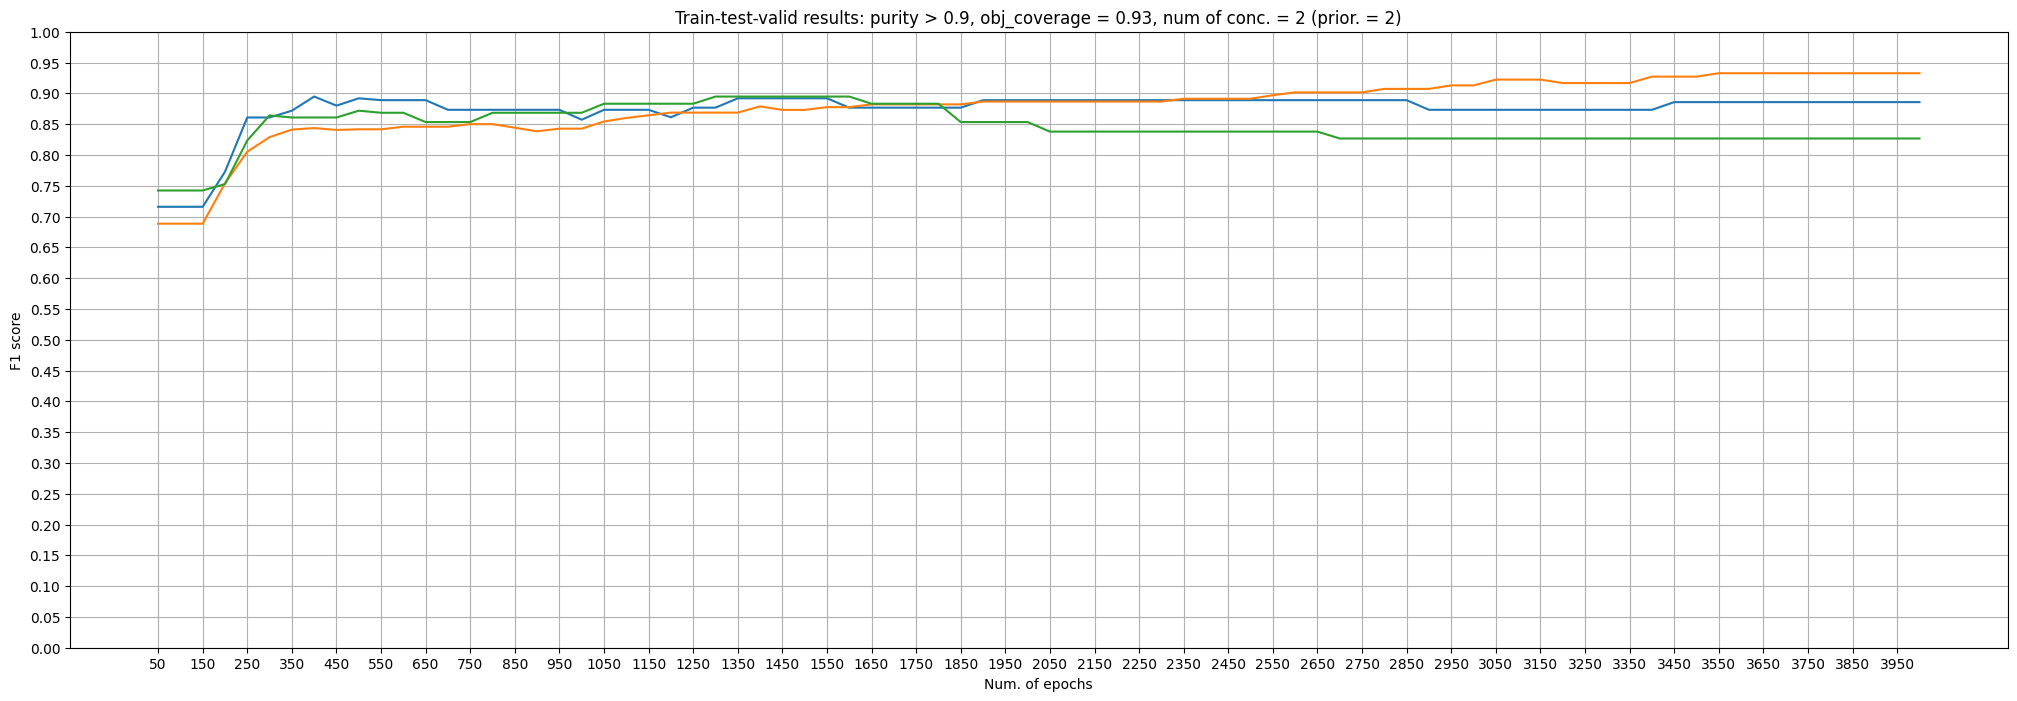

In [55]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)

plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 4050, 100))
plt.yticks(np.arange(0, 1.05, 0.05))

## Test Check

# TESTING !!!!

In [100]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[20], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(27):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.8767123287671232
1
score test: 0.8611111111111112
2
score test: 0.8767123287671232
3
score test: 0.8767123287671232
4
score test: 0.8767123287671232
5
score test: 0.8611111111111112
6
score test: 0.8767123287671232
7
score test: 0.8611111111111112
8
score test: 0.8767123287671232
9
score test: 0.8611111111111112
10
score test: 0.8767123287671232
11
score test: 0.8767123287671232
12
score test: 0.8767123287671232
13
score test: 0.8611111111111112
14
score test: 0.8767123287671232
15
score test: 0.8611111111111112
16
score test: 0.8767123287671232
17
score test: 0.8611111111111112
18
score test: 0.8918918918918919
19
score test: 0.8767123287671232
20
score test: 0.8767123287671232
21
score test: 0.8450704225352113
22
score test: 0.8611111111111112
23
score test: 0.8918918918918919
24
score test: 0.8611111111111112
25
score test: 0.8767123287671232
26
score test: 0.8918918918918919
27
score test: 0.8611111111111112
28
score test: 0.8767123287671232
29
score test: 0.8767123

In [64]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [ ]:
f1_scores_counts.drop(0,axis=0,inplace=True)
f1_scores_counts

In [65]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[50].intent, L_[22].intent], full_list_ind[1][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874


In [71]:
f1_scores_counts.loc[1] = [[L_[46].intent, L_[24].intent], full_list_ind[2][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.0,0.871


In [73]:
f1_scores_counts.loc[2] = [[L_[45].intent, L_[24].intent], full_list_ind[3][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.0,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.0,0.881


In [75]:
f1_scores_counts.loc[3] = [[L_[41].intent, L_[22].intent], full_list_ind[4][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.0,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.0,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.0,0.867


In [ ]:
f1_scores_counts.drop(4,axis=0,inplace=True)
f1_scores_counts

In [ ]:
f1_scores_counts.drop(3,axis=0,inplace=True)
# f1_scores_counts

In [77]:
f1_scores_counts.loc[4] = [[L_[38].intent, L_[41].intent], full_list_ind[6][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.0,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.0,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.0,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.0,0.861


In [ ]:
f1_scores_counts.to_csv('hd_65_2.csv')

In [79]:
f1_scores_counts.loc[5] = [[L_[33].intent, L_[43].intent], full_list_ind[7][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.0,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.0,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.0,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.0,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.0,0.883


In [81]:
f1_scores_counts.loc[6] = [[L_[27].intent, L_[41].intent], full_list_ind[11][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.0,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.0,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.0,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.0,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.0,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.0,0.868


In [83]:
f1_scores_counts.loc[7] = [[L_[29].intent, L_[41].intent], full_list_ind[10][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.0,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.0,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.0,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.0,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.0,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.0,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.0,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.0,0.867


In [85]:
f1_scores_counts.loc[8] = [[L_[30].intent, L_[33].intent], full_list_ind[9][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880


In [87]:
f1_scores_counts.loc[9] = [[L_[12].intent, L_[46].intent], full_list_ind[16][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [89]:
f1_scores_counts.loc[10] = [[L_[23].intent, L_[45].intent], full_list_ind[13][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [91]:
f1_scores_counts.loc[11] = [[L_[11].intent, L_[43].intent], full_list_ind[17][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [93]:
f1_scores_counts.loc[12] = [[L_[10].intent, L_[45].intent], full_list_ind[18][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [95]:
f1_scores_counts.loc[13] = [[L_[19].intent, L_[38].intent], full_list_ind[15][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [97]:
f1_scores_counts.loc[14] = [[ L_[2].intent, L_[50].intent], full_list_ind[21][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [99]:
f1_scores_counts.loc[15] = [[L_[4].intent, L_[45].intent], full_list_ind[19][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [101]:
f1_scores_counts.loc[16] = [[L_[3].intent, L_[50].intent], full_list_ind[20][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(sex, thalach 70-95, thalach 186-202, oldpeak...",1.00,0.874
1,"[(sex, age 29-40, thalach 186-202, oldpeak 2.,...",1.00,0.871
2,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",1.00,0.881
3,"[(sex, thalach 186-202, oldpeak 2., ca = 3, ca...",1.00,0.867
4,"[(sex, thalach 70-95, oldpeak 1., ca = 1, ca =...",1.00,0.861
5,"[(sex, thalach 70-95, oldpeak 1., oldpeak 2., ...",1.00,0.883
6,"[(sex, thalach 70-95, oldpeak 1., ca = 3, ca =...",1.00,0.868
7,"[(sex, thalach 70-95, oldpeak 2., ca = 1, ca =...",1.00,0.867
8,"[(sex, age 29-40, cp = 1, thalach 70-95, thala...",0.93,0.880
9,"[(sex, thalach 70-95, oldpeak 3.-6., slope = 0...",0.93,0.869


In [102]:
f1_scores_counts.to_csv('Heart_Disease_60_2.csv')